#  Perceptron (Clasificador Binario con Iris)
---
**Autor:** Escalante Guadarrama Jorge Eduardo


**Importar librerias**

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

**Cargar y preparar el dataset**

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only Setosa and Versicolor classes
X = X[y != 2]
y = y[y != 2]

# Use only petal length and petal width features
X = X[:, [2, 3]]

**Dividir los datos en entrenamiento y prueba**

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Entrenar el modelo**

In [4]:
# Create and train the model
clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

**Realizar predicciones y evaluar el modelo**

In [5]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 100.00%


**Visualizar la frontera de decisión**

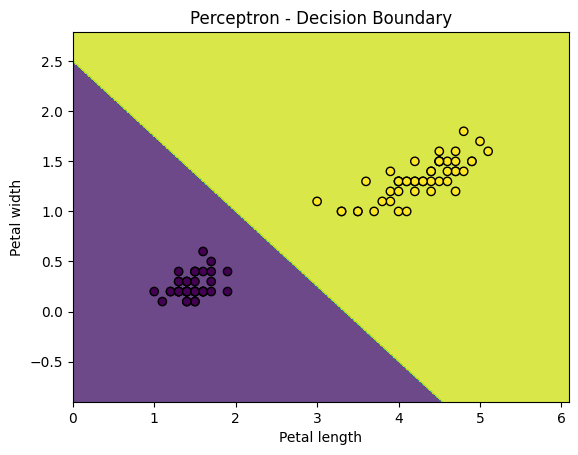

In [6]:
# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Perceptron - Decision Boundary')
plt.show()